<a href="https://colab.research.google.com/github/alisheraxmedov/LinearRegression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# CSV faylni o'qib olish
df = pd.read_csv("/content/canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [ ]:
# Ustun nomini o'zgartish
df.rename(columns = {"per capita income (US$)": "price_per_years"}, inplace=True)
df.head()

,year,price_per_years
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


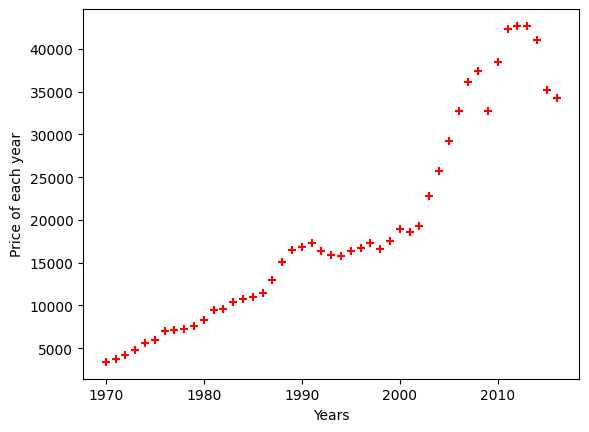

In [ ]:
# Grafik chizish
plt.xlabel("Years")
plt.ylabel("Price of each year")
plt.scatter(df.year, df.price_per_years, color="red", marker="+")

In [ ]:
# Linear Regression modelini yaratish
reg = linear_model.LinearRegression()
reg.fit(df[["year"]], df.price_per_years)

LinearRegression()

**WARNING** 2005 yil mavjud emasligi uchun chiqmoqda.

In [ ]:
# 2005-yil uchun narxni bashorat qilish

year = np.array([[2005]])                   # 2D ko'rinishiga o'tkazib olinyapti
price_year = reg.predict(year)              # predict 2D shaklidagi qiymat kutadi !

print(price_year)

[28861.71796608]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Linear Regression ning formulasi:

***y = a * x + b*** => `price` = ```reg.coef_``` * 2005 + ```reg.intercept_```

In [ ]:
coef = reg.coef_
intercept = reg.intercept_

print(f"Coefficient: {coef}")
print(f"Intercept: {intercept}")

828.46507522 * 2005 + (-1632210.7578554575)

Coefficient: [828.46507522]
Intercept: -1632210.7578554575


28861.71796064265

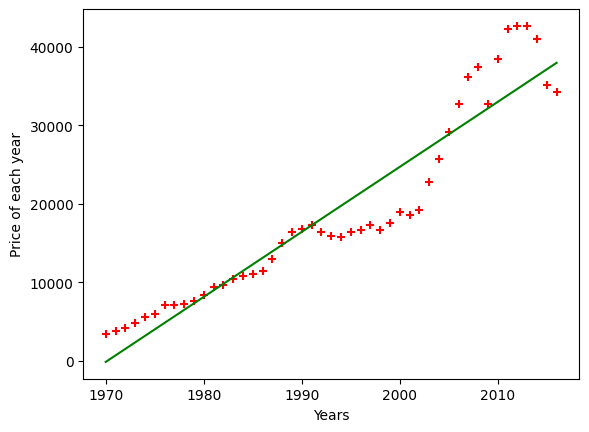

In [105]:
plt.xlabel("Years")
plt.ylabel("Price of each year")
plt.scatter(df.year, df.price_per_years, color="red", marker="+")
plt.plot(df.year, reg.predict(df[['year']]), color='green')

`years.csv` faylida faqat yillar mavjud. Yuqoridagi `coef` va `intercept` dan foydalanib *`narxlarni{price_per_year}`* topish.  

---

The `years.csv` file contains only years. Using `coef` and `intercept` above, find *`prices{price_per_year}`*.

In [95]:
df2 = pd.read_csv("/content/years.csv")
df2.head(5)

,years
0,1977
1,1979
2,1881
3,1888
4,1995


In [96]:
p = reg.predict(np.array(df2))
print(p)

[  5664.69585984   7321.62601029 -73867.95136154 -68068.69583498
  20577.06721385  23890.92751474  25547.85766519  27204.78781563
  33832.50841741]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [97]:
df2["price_per_year"] = p

df2.head(9)

,years,price_per_year
0,1977,5664.695860
1,1979,7321.626010
2,1881,-73867.951362
3,1888,-68068.695835
4,1995,20577.067214
5,1999,23890.927515
6,2001,25547.857665
7,2003,27204.787816
8,2011,33832.508417
